## Imports

In [2]:
import os, time, timeit, json, torch
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style("ticks")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# from scripts.hydra import Hydra, SparseScaler
%load_ext autoreload
%autoreload 2
from scripts import farseeing #, deep_learning_models
from scripts import classifiers

Train set: X: (693, 2750), y: (693,)    ([ADLs, Falls]) [599  94]
Test set: X: (516, 2750), y: (516,)    ([ADLs, Falls]) [465  51]


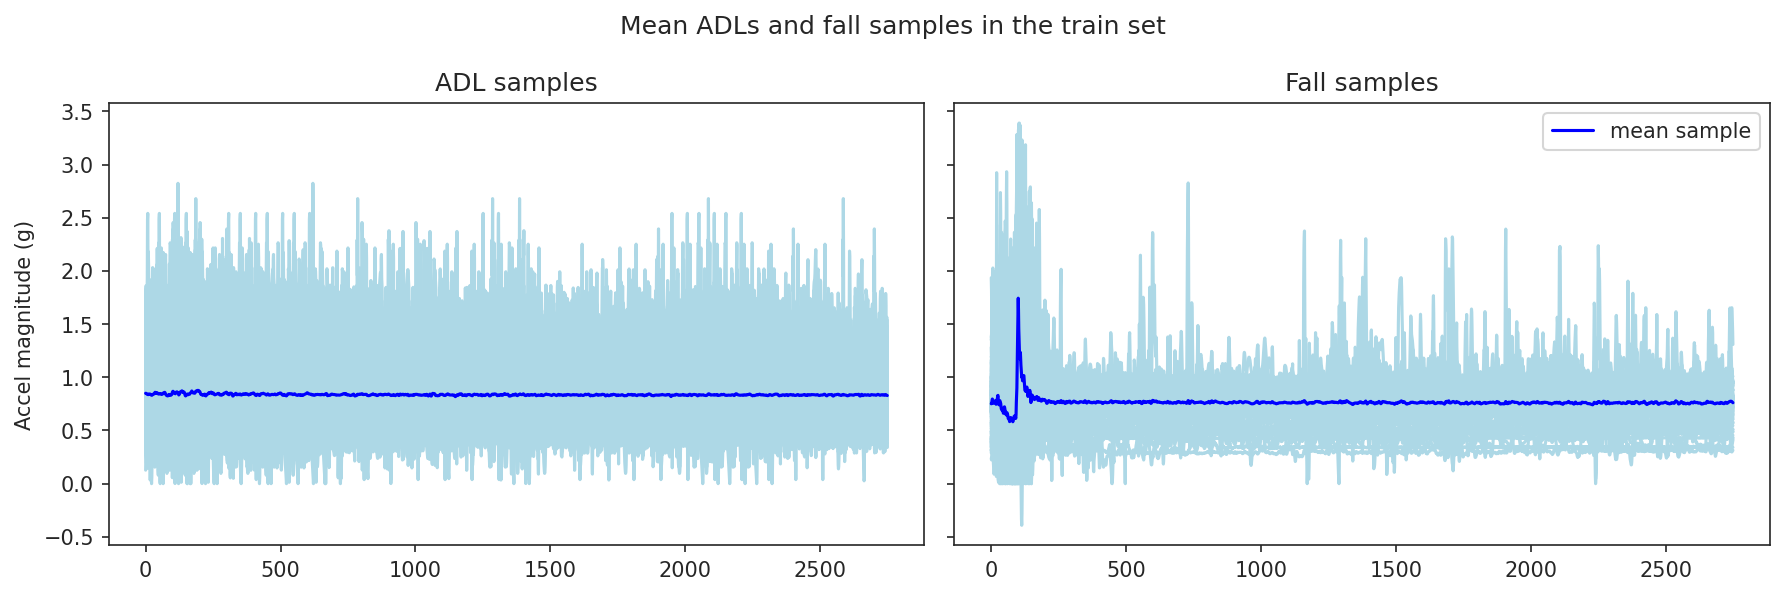

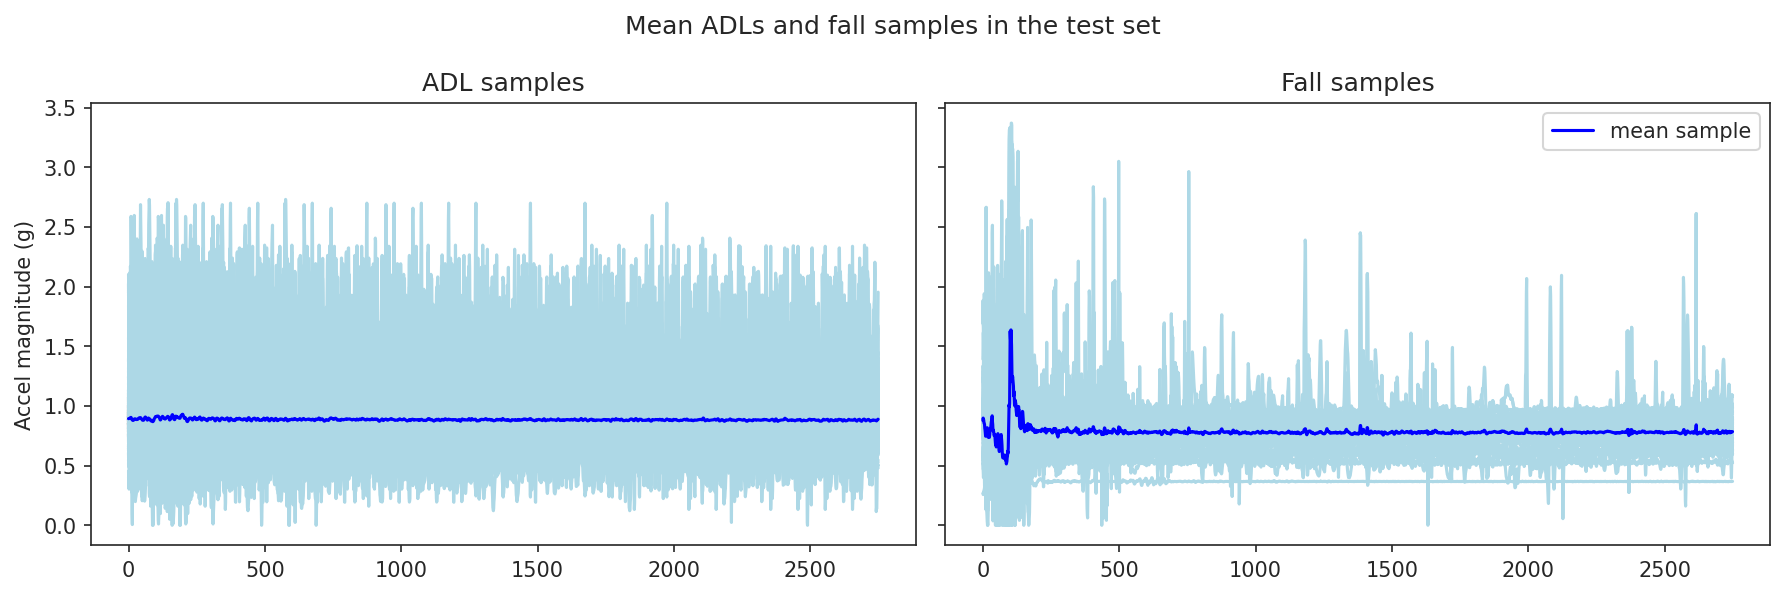

In [3]:
X_train, y_train, X_test, y_test = farseeing.train_test_subjects_split()

## Baselines with Tabular Models

In [4]:
tabular_metrics = None
for window_size in [2750, 700, 300]:
	if tabular_metrics is None:
		tabular_metrics = classifiers.run_tabular_models(
			X_train, y_train, X_test, y_test, window_size
		)
	else:
		new_metrics = classifiers.run_tabular_models(
			X_train, y_train, X_test, y_test, window_size
		)
		tabular_metrics = pd.concat([tabular_metrics, new_metrics])

> Logistic          (win_size=2750)	Training/Testing in 7.67 secs.
> RandomForest      (win_size=2750)	Training/Testing in 2.65 secs.
> KNN               (win_size=2750)	Training/Testing in 0.21 secs.
> Ridge             (win_size=2750)	Training/Testing in 0.04 secs.
> ExtraTrees        (win_size=2750)	Training/Testing in 0.25 secs.
> Logistic          (win_size=700)	Training/Testing in 0.5 secs.
> RandomForest      (win_size=700)	Training/Testing in 1.26 secs.
> KNN               (win_size=700)	Training/Testing in 0.08 secs.
> Ridge             (win_size=700)	Training/Testing in 0.02 secs.
> ExtraTrees        (win_size=700)	Training/Testing in 0.24 secs.
> Logistic          (win_size=300)	Training/Testing in 0.53 secs.
> RandomForest      (win_size=300)	Training/Testing in 0.85 secs.
> KNN               (win_size=300)	Training/Testing in 0.06 secs.
> Ridge             (win_size=300)	Training/Testing in 0.01 secs.
> ExtraTrees        (win_size=300)	Training/Testing in 0.26 secs.


In [5]:
tabular_metrics.sort_values(by='model').reset_index().drop(columns=['index'])

,model,window_size,runtime,precision,recall,f1-score
0,ExtraTrees,2750,0.246934,0.933333,0.823529,0.875000
1,ExtraTrees,700,0.243562,0.955556,0.843137,0.895833
2,ExtraTrees,300,0.259331,0.976744,0.823529,0.893617
3,KNN,2750,0.211279,0.774194,0.470588,0.585366
4,KNN,700,0.076052,0.960000,0.470588,0.631579
5,KNN,300,0.057260,0.954545,0.411765,0.575342
6,Logistic,2750,7.666039,0.875000,0.686275,0.769231
7,Logistic,700,0.499531,0.875000,0.686275,0.769231
8,Logistic,300,0.527469,0.875000,0.686275,0.769231
9,RandomForest,2750,2.646030,0.954545,0.823529,0.884211


In [6]:
crosstab = tabular_metrics.pivot_table('f1-score', ['model'], 'window_size')
crosstab

window_size,300,700,2750
model,,,
ExtraTrees,0.893617,0.895833,0.875000
KNN,0.575342,0.631579,0.585366
Logistic,0.769231,0.769231,0.769231
RandomForest,0.884615,0.860000,0.884211
Ridge,0.781609,0.786517,0.639175


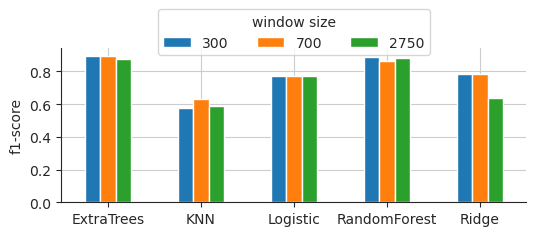

In [7]:
crosstab.plot(kind='bar', rot=0, figsize=(6,2))
plt.grid()
plt.xlabel('')
plt.ylabel('f1-score')
plt.legend(loc=9, ncol=3, bbox_to_anchor=(0.5,1.3), title='window size')
sns.despine()

In [4]:
ts_metrics = classifiers.run_ts_models(X_train, y_train, X_test, y_test)

2024-05-29 22:59:30.201561: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-29 22:59:30.225606: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 22:59:30.854314: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


> Hydra             (win_size=2750)	Training/Testing in 48.66 secs.
> Rocket            (win_size=2750)	Training/Testing in 6.65 secs.
> MultiRocketHydra  (win_size=2750)	Training/Testing in 52.43 secs.
> FCN               (win_size=2750)	Training

2024-05-29 23:01:19.138046: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
in 251.95 secs.
> Catch22           (win_size=2750)	Training/Testing in 15.0 secs.
> QUANT             (win_size=2750)	Training/Testing in 197.56 secs.
> DrCIF             (win_size=2750)	Training/Testing in 20347.54 secs.


In [5]:
ts_metrics

,model,window_size,runtime,precision,recall,f1-score
0,Hydra,2750,48.658971,0.901961,0.901961,0.901961
1,Rocket,2750,6.650793,0.840000,0.823529,0.831683
2,MultiRocketHydra,2750,52.433394,0.844828,0.960784,0.899083
3,FCN,2750,251.948199,1.000000,0.078431,0.145455
4,Catch22,2750,15.003329,0.676923,0.862745,0.758621
5,QUANT,2750,197.560748,0.903846,0.921569,0.912621
6,DrCIF,2750,20347.538946,0.877551,0.843137,0.860000


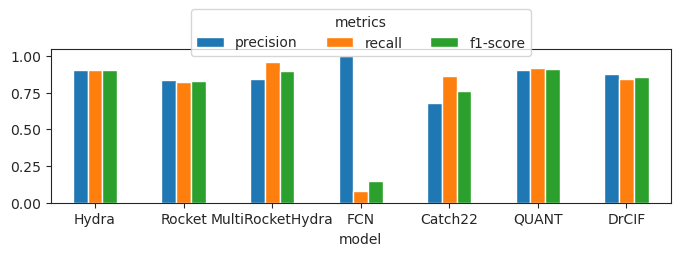

In [19]:
classifiers.plot_metrics(ts_metrics, figsize=(8, 2))